In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
experiments = [
    'gat_x1',
    'gatv2_x1',
    'joint_x1',
    'joint_roberta_x1',
    'joint_roberta_x1_lr3.5',
    'joint_twitter_roberta_x1',
    'joint_twitter_roberta_x1_lr3.5',
    'jointv2_x1',
    'jointv2_roberta_x1',
    'jointv2_roberta_x1_lr3.5',
    'joint_x10',
    'jointv2_x10',
]

baseline = ['joint_x10']
final_results = []

In [15]:
data_x1 = []
data_x10 = []

for _, experiment in enumerate(experiments):
    print(f"Pulling data for experiment {experiment}...")
    file_path = f"../results/{experiment}_metrics.json"
    f = open(file_path)
    data = json.load(f)
    f.close()
    data = [*data.values()]
    if len(data) == 1:
        d_x1 = data[0]
        # print(data)
        d_x1 = {k:v for k,v in d_x1.items() if type(v) is list and len(v) > 0}
        data_x1.append(pd.DataFrame.from_dict(d_x1))
    else:
        d_x10 = [{k:v for k,v in d.items() if type(v) is list and len(v) > 0} for d in data]
        data_x10.append([pd.DataFrame.from_dict(d) for d in d_x10])
print(len(data_x1))
print(len(data_x10))

Pulling data for experiment gat_x1...
Pulling data for experiment gatv2_x1...
Pulling data for experiment joint_x1...
Pulling data for experiment joint_roberta_x1...
Pulling data for experiment joint_roberta_x1_lr3.5...
Pulling data for experiment joint_twitter_roberta_x1...
Pulling data for experiment joint_twitter_roberta_x1_lr3.5...
Pulling data for experiment jointv2_x1...
Pulling data for experiment jointv2_roberta_x1...
Pulling data for experiment jointv2_roberta_x1_lr3.5...
Pulling data for experiment joint_x10...
Pulling data for experiment jointv2_x10...
10
2


Text(0, 0.5, 'Training accuracy')

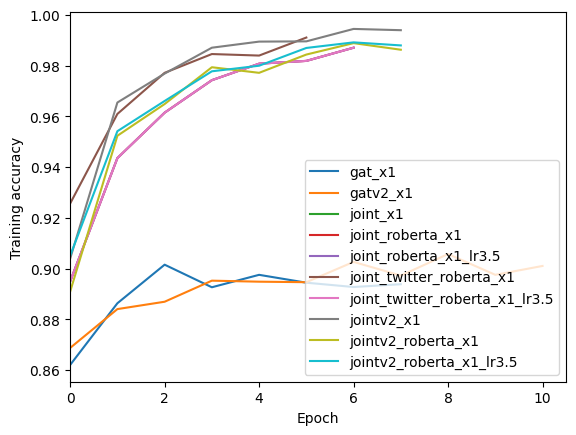

In [17]:
plt.figure()

sample = experiments[0:10]

for idx, experiment in enumerate(sample):
    d = data_x1[0:10][idx].train_acc
    plt.plot(d, label=experiments[0:10][idx])
plt.legend()
plt.xlabel('Epoch')
plt.xlim(0.0)
plt.ylabel('Training accuracy')